## Data Pre-Processing

In [9]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Importing dataset
dataset = pd.read_csv('datasets/logistic-regression-data.csv')

# Separate dataset (X) and dependent vector (y)
X = dataset.filter(items=['Age', 'EstimatedSalary'])
y = dataset.filter(items=['Purchased'])


# Splitting Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = pd.DataFrame(sc_X.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(sc_X.transform(X_test), columns=X_test.columns)

## Logistic regression

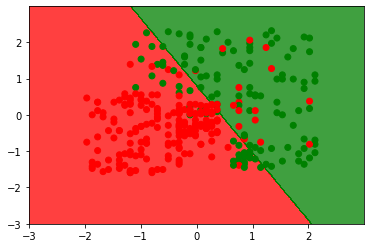

In [51]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start = X_set['Age'].min().round(0) - 1, stop = X_set['Age'].max().round(0) + 1, step = 0.01),
    np.arange(start = X_set['EstimatedSalary'].min().round(0) - 1, stop = X_set['EstimatedSalary'].max().round(0) + 1, step = 0.01)
)
plt.contourf(X1,X2,
    classifier.predict(
        np.array(
            [
                X1.ravel(),
                X2.ravel()
            ]
        ).T
    ).reshape(X1.shape), 
    alpha = 0.75,
    cmap = ListedColormap(('red','green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
y_set_colors = y_set.values.ravel()
cmap = ListedColormap(('red','green'))
to_color = lambda val: cmap(val)
y_set_colors = to_color(y_set_colors)

plt.scatter(X_set['Age'], X_set['EstimatedSalary'], c = y_set_colors)